In [1]:
# Importing all the required dependencies
import os
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import json

Using TensorFlow backend.


In [2]:
# Reading the sampled data containing 12 features, 10152 rows and 11 classes
sampled_data = pd.read_csv('../dataset/dataset-12-features/sampled-dataset.csv')
sampled_df=pd.DataFrame(sampled_data)

In [3]:
# Reading the original data containing 12 features, 34803 rows and 11 classes
original_data = pd.read_csv('../dataset/dataset-12-features/original-dataset-cleaned.csv')
original_df=pd.DataFrame(original_data)

In [4]:
# Changing class names to numerical values
class_name =sampled_df['class'].unique()
le = preprocessing.LabelEncoder()
le.fit(sampled_df['class'])
sampled_df['class']=le.transform(sampled_df['class'])
original_df['class']=le.transform(original_df['class'])
class_id = sampled_df['class'].unique()

In [5]:
# Mapping class names and ids(numerical values)
class_dict={}
for i in range(0,len(class_name)):
    class_dict[int(class_id[i])]=class_name[i]

In [6]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 13 columns):
mean_fpktl    10152 non-null int64
std_fpktl     10152 non-null int64
mean_bpktl    10152 non-null int64
std_bpktl     10152 non-null int64
mean_fiat     10152 non-null int64
std_fiat      10152 non-null int64
mean_biat     10152 non-null int64
std_biat      10152 non-null int64
fpkt_rate     10152 non-null float64
fbyte_rate    10152 non-null float64
bpkt_rate     10152 non-null float64
bbyte_rate    10152 non-null float64
class         10152 non-null int64
dtypes: float64(4), int64(9)
memory usage: 1.0 MB


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34803 entries, 0 to 34802
Data columns (total 13 columns):
mean_fpktl    34803 non-null int64
std_fpktl     34803 non-null int64
mean_bpktl    34803 non-null int64
std_bpktl     34803 non-null int64
mean_fiat     34803 non-null int64
std_fiat      34803 non-null int64
mean_biat     34803 non-null int64
std_biat      34803 non-null int64
fpkt_rate     34803 non-null float64
fbyte_rate    34803 non-null float64
bpkt_rate     34803 non-null float64
bbyte_rate    34803 non-null float64
class         34803 non-null int64
dtypes: float64(4), int64(9)
memory usage: 3.5 MB


<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

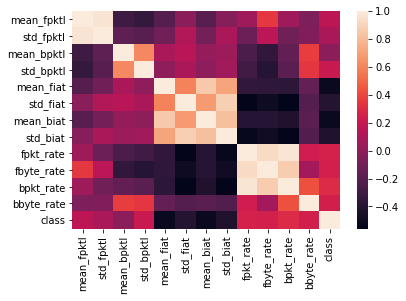

In [8]:
# Correlation Matrix for sampled data
corr = sampled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

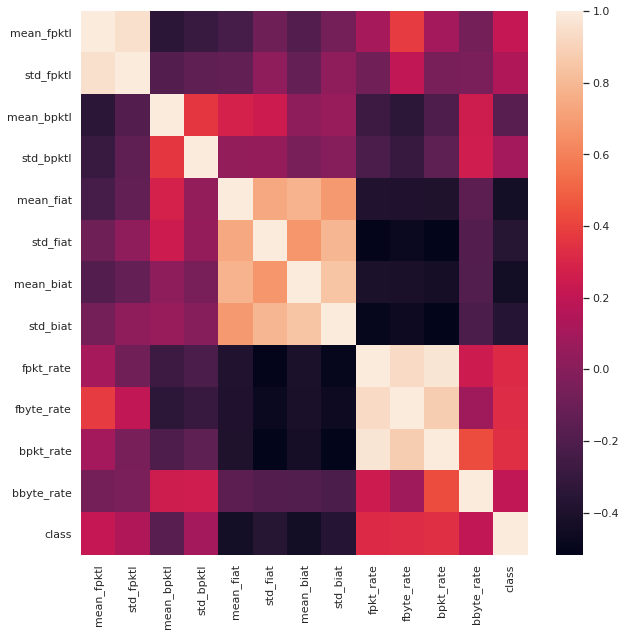

In [9]:
# Correlation Matrix for original data
corr = original_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

In [10]:
# Dividing into training and testing sets 
# Training Data Sampled Dataset 100%
# Testing Data Original Dataset 100%
X = sampled_df.drop(['class'],axis=1)
y = np.ravel(sampled_df['class'])
X_orig = original_df.drop(['class'],axis=1)
y_orig = np.ravel(original_df['class'])

In [11]:
# Scaling the inputs
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_orig = scaler.transform(X_orig)

In [12]:
# Defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(12,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(11,activation='softmax'))

In [13]:
# Model Summary
model.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                187       
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Training the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X, y,epochs=100, batch_size=32, verbose=0,validation_data=(X_orig,y_orig))

<Figure size 432x288 with 0 Axes>

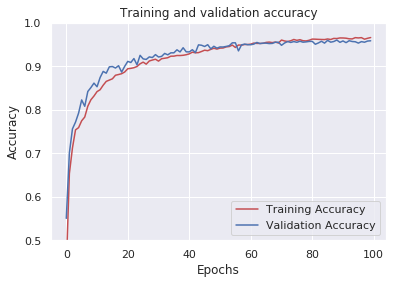

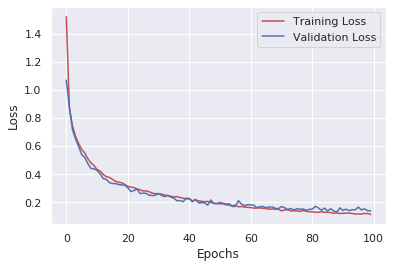

<Figure size 432x288 with 0 Axes>

In [15]:
# Plotting accuracy and loss

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy",)
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim(0.5, 1.0)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.figure()

In [16]:
# Model prediction stats
y_pred = model.predict(X_orig)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_orig, y_pred_bool))
print(confusion_matrix(y_orig, y_pred_bool))
print("\nMap to class id and class name: ")
print(json.dumps(class_dict, indent=4, sort_keys=True))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1439
           1       0.84      0.96      0.89       295
           2       0.79      0.95      0.87      3470
           3       0.92      0.99      0.96       857
           4       1.00      0.94      0.97     14959
           5       0.99      1.00      0.99      2521
           6       0.99      0.98      0.99      2422
           7       1.00      0.92      0.96      2411
           8       0.94      0.99      0.96      2412
           9       0.94      0.99      0.96      2004
          10       0.98      0.98      0.98      2013

    accuracy                           0.96     34803
   macro avg       0.94      0.97      0.96     34803
weighted avg       0.96      0.96      0.96     34803

[[ 1435     3     0     0     1     0     0     0     0     0     0]
 [   10   284     0     0     1     0     0     0     0     0     0]
 [    1    10  3299    14    51     0     1     0